# Red Inicial


## Imports


In [27]:
from __future__ import annotations

from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from custom_env.actions import Acciones
from custom_env.router_env import RouterEnv
from custom_env.states import NormalState, AttackState
from custom_env.utils import Color, Location
from gymnasium import make
from gymnasium.utils.env_checker import check_env
from pandas import DataFrame, Series
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.logger import Logger, configure
from stable_baselines3.common.monitor import Monitor

In [3]:
name = "./models/Example"
logs_path = "./logs/train/"
models_path = "./models/"
env_id = "RouterEnv-v0"

progress_bar = True
if progress_bar == True:
    import rich
    import tqdm

## Clases y Funciones


In [4]:
tiempo_global: float = 0.0
iteraciones = 0
# Decaorador auxiliar para poder medir el tiempo de las funciones


def medir_tiempo(activado=False):
    def fun(funcion):
        def wrapper(*args, **kwargs):
            if not activado:
                return funcion(*args, **kwargs)
            fun_tiempo = perf_counter
            inicio: float = fun_tiempo()
            resultado = funcion(*args, **kwargs)
            tiempo_total: float = fun_tiempo() - inicio
            global tiempo_global, iteraciones
            medida = 1e6
            t: float = tiempo_total*medida
            tiempo_global += t
            iteraciones += 1
            print(f"Tiempo de ejecución de {
                funcion.__name__}: {t:.2f} micro-segundos")
            return resultado
        return wrapper
    return fun


def calcular_stats_acciones(acciones):
    if isinstance(acciones[-1], int):
        acciones = [Acciones.int_to_action(a) for a in acciones]
    print(f"{Acciones.DENEGAR.name}: {acciones.count(Acciones.DENEGAR)/len(acciones):.2%}")
    print(f"{Acciones.PERMITIR.name}: {acciones.count(Acciones.PERMITIR)/len(acciones):.2%}")

## Entrenamiento


In [12]:
seed = None
env: RouterEnv = make(env_id, seed=seed)

check_env(env)

print("Seed: ", env._np_random_seed)

new_logger: Logger = configure(logs_path, ["stdout", "csv"])
env = Monitor(env, logs_path)


model: PPO = PPO("MultiInputPolicy", env,
                 verbose=True)


model.set_logger(new_logger)
try:
    model.learn(total_timesteps=int(1e5//2),
                progress_bar=progress_bar)
except KeyboardInterrupt:
    print("Entrenamiento interrumpido")


g: str = input("¿Desea guardarlo? (s/n) ")
if g.lower() == "s":
    model.save(name)
    print("Modelo guardado")

Seed:  52450356711516293768110567925650772087
Logging to ./logs/train/


Output()

Using cpu device
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | -35.2    |
| time/              |          |
|    fps             | 504      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 782          |
| time/                   |              |
|    fps                  | 435          |
|    iterations           | 2            |
|    time_elapsed         | 9            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0069813533 |
|    clip_fraction        | 0.000928     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.69        |
|    explained_variance   | 2.64e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 6.41e+03     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.000903    |
|    value_loss           | 1.27e+04     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.12e+03    |
| time/                   |             |
|    fps                  | 413         |
|    iterations           | 3           |
|    time_elapsed         | 14          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.005140322 |
|    clip_fraction        | 0.0815      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.692      |
|    explained_variance   | 0.0842      |
|    learning_rate        | 0.0003      |
|    loss                 | 1.87e+03    |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.00814    |
|    value_loss           | 4.35e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.02e+03     |
| time/                   |              |
|    fps                  | 418          |
|    iterations           | 4            |
|    time_elapsed         | 19           |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0067886356 |
|    clip_fraction        | 0.097        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.689       |
|    explained_variance   | 0.0244       |
|    learning_rate        | 0.0003       |
|    loss                 | 1.84e+03     |
|    n_updates            | 30           |
|    policy_gradient_loss | -0.00906     |
|    value_loss           | 4.77e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 1.15e+03      |
| time/                   |               |
|    fps                  | 419           |
|    iterations           | 5             |
|    time_elapsed         | 24            |
|    total_timesteps      | 10240         |
| train/                  |               |
|    approx_kl            | 0.00015517359 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.687        |
|    explained_variance   | 0.00611       |
|    learning_rate        | 0.0003        |
|    loss                 | 4.5e+03       |
|    n_updates            | 40            |
|    policy_gradient_loss | -0.000159     |
|    value_loss           | 1.03e+04      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 859          |
| time/                   |              |
|    fps                  | 414          |
|    iterations           | 6            |
|    time_elapsed         | 29           |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 0.0024183092 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.684       |
|    explained_variance   | 0.245        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.48e+03     |
|    n_updates            | 50           |
|    policy_gradient_loss | -0.000555    |
|    value_loss           | 7.86e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 973          |
| time/                   |              |
|    fps                  | 412          |
|    iterations           | 7            |
|    time_elapsed         | 34           |
|    total_timesteps      | 14336        |
| train/                  |              |
|    approx_kl            | 0.0042900587 |
|    clip_fraction        | 0.00659      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.681       |
|    explained_variance   | 0.244        |
|    learning_rate        | 0.0003       |
|    loss                 | 9.47e+03     |
|    n_updates            | 60           |
|    policy_gradient_loss | -0.000791    |
|    value_loss           | 1.82e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 891          |
| time/                   |              |
|    fps                  | 411          |
|    iterations           | 8            |
|    time_elapsed         | 39           |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 0.0047335615 |
|    clip_fraction        | 0.0452       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.681       |
|    explained_variance   | 0.186        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.25e+03     |
|    n_updates            | 70           |
|    policy_gradient_loss | -0.0052      |
|    value_loss           | 5.25e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 980         |
| time/                   |             |
|    fps                  | 415         |
|    iterations           | 9           |
|    time_elapsed         | 44          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.002406516 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.678      |
|    explained_variance   | 0.176       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.24e+03    |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.000486   |
|    value_loss           | 1.73e+04    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.03e+03     |
| time/                   |              |
|    fps                  | 418          |
|    iterations           | 10           |
|    time_elapsed         | 48           |
|    total_timesteps      | 20480        |
| train/                  |              |
|    approx_kl            | 0.0054781605 |
|    clip_fraction        | 0.0577       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.674       |
|    explained_variance   | 0.146        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.46e+03     |
|    n_updates            | 90           |
|    policy_gradient_loss | -0.00817     |
|    value_loss           | 5.56e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 1.1e+03       |
| time/                   |               |
|    fps                  | 420           |
|    iterations           | 11            |
|    time_elapsed         | 53            |
|    total_timesteps      | 22528         |
| train/                  |               |
|    approx_kl            | 0.00069138897 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.673        |
|    explained_variance   | 0.435         |
|    learning_rate        | 0.0003        |
|    loss                 | 2.99e+03      |
|    n_updates            | 100           |
|    policy_gradient_loss | -0.000406     |
|    value_loss           | 7.92e+03      |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.17e+03    |
| time/                   |             |
|    fps                  | 422         |
|    iterations           | 12          |
|    time_elapsed         | 58          |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.003839699 |
|    clip_fraction        | 0.0346      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.66       |
|    explained_variance   | 0.485       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.37e+03    |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.00291    |
|    value_loss           | 5.19e+03    |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 400        |
|    ep_rew_mean          | 1.04e+03   |
| time/                   |            |
|    fps                  | 419        |
|    iterations           | 13         |
|    time_elapsed         | 63         |
|    total_timesteps      | 26624      |
| train/                  |            |
|    approx_kl            | 0.00980007 |
|    clip_fraction        | 0.0516     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.627     |
|    explained_variance   | 0.186      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.99e+03   |
|    n_updates            | 120        |
|    policy_gradient_loss | -0.00962   |
|    value_loss           | 4.85e+03   |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 897          |
| time/                   |              |
|    fps                  | 420          |
|    iterations           | 14           |
|    time_elapsed         | 68           |
|    total_timesteps      | 28672        |
| train/                  |              |
|    approx_kl            | 0.0019788223 |
|    clip_fraction        | 0.02         |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.609       |
|    explained_variance   | 0.389        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.2e+04      |
|    n_updates            | 130          |
|    policy_gradient_loss | -0.00162     |
|    value_loss           | 3.58e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 821          |
| time/                   |              |
|    fps                  | 423          |
|    iterations           | 15           |
|    time_elapsed         | 72           |
|    total_timesteps      | 30720        |
| train/                  |              |
|    approx_kl            | 0.0029142844 |
|    clip_fraction        | 0.0667       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.625       |
|    explained_variance   | 0.462        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.68e+04     |
|    n_updates            | 140          |
|    policy_gradient_loss | -0.00356     |
|    value_loss           | 3.38e+04     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 866         |
| time/                   |             |
|    fps                  | 424         |
|    iterations           | 16          |
|    time_elapsed         | 77          |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.008981895 |
|    clip_fraction        | 0.0957      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.653      |
|    explained_variance   | 0.492       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.31e+03    |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.0113     |
|    value_loss           | 1.98e+04    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 905          |
| time/                   |              |
|    fps                  | 425          |
|    iterations           | 17           |
|    time_elapsed         | 81           |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 0.0041572475 |
|    clip_fraction        | 0.0275       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.658       |
|    explained_variance   | 0.74         |
|    learning_rate        | 0.0003       |
|    loss                 | 2.27e+03     |
|    n_updates            | 160          |
|    policy_gradient_loss | -0.00121     |
|    value_loss           | 5.64e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 898          |
| time/                   |              |
|    fps                  | 425          |
|    iterations           | 18           |
|    time_elapsed         | 86           |
|    total_timesteps      | 36864        |
| train/                  |              |
|    approx_kl            | 0.0019427575 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.65        |
|    explained_variance   | 0.702        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.87e+03     |
|    n_updates            | 170          |
|    policy_gradient_loss | -0.00103     |
|    value_loss           | 5.73e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 919          |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 19           |
|    time_elapsed         | 91           |
|    total_timesteps      | 38912        |
| train/                  |              |
|    approx_kl            | 0.0048159817 |
|    clip_fraction        | 0.00283      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.625       |
|    explained_variance   | 0.702        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.92e+03     |
|    n_updates            | 180          |
|    policy_gradient_loss | -0.00155     |
|    value_loss           | 8.2e+03      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 925          |
| time/                   |              |
|    fps                  | 424          |
|    iterations           | 20           |
|    time_elapsed         | 96           |
|    total_timesteps      | 40960        |
| train/                  |              |
|    approx_kl            | 0.0010101453 |
|    clip_fraction        | 0.00322      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.597       |
|    explained_variance   | 0.734        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.04e+03     |
|    n_updates            | 190          |
|    policy_gradient_loss | -0.000922    |
|    value_loss           | 6.45e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 977          |
| time/                   |              |
|    fps                  | 424          |
|    iterations           | 21           |
|    time_elapsed         | 101          |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 0.0027765073 |
|    clip_fraction        | 0.0302       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.563       |
|    explained_variance   | 0.769        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.09e+03     |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.00653     |
|    value_loss           | 5.62e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 973          |
| time/                   |              |
|    fps                  | 423          |
|    iterations           | 22           |
|    time_elapsed         | 106          |
|    total_timesteps      | 45056        |
| train/                  |              |
|    approx_kl            | 0.0023123198 |
|    clip_fraction        | 0.021        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.57        |
|    explained_variance   | 0.731        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.61e+03     |
|    n_updates            | 210          |
|    policy_gradient_loss | -0.00147     |
|    value_loss           | 4.8e+03      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 950          |
| time/                   |              |
|    fps                  | 419          |
|    iterations           | 23           |
|    time_elapsed         | 112          |
|    total_timesteps      | 47104        |
| train/                  |              |
|    approx_kl            | 0.0026073987 |
|    clip_fraction        | 0.0385       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.563       |
|    explained_variance   | 0.757        |
|    learning_rate        | 0.0003       |
|    loss                 | 2e+03        |
|    n_updates            | 220          |
|    policy_gradient_loss | -0.00191     |
|    value_loss           | 4.14e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 915          |
| time/                   |              |
|    fps                  | 415          |
|    iterations           | 24           |
|    time_elapsed         | 118          |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0045559173 |
|    clip_fraction        | 0.0122       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.552       |
|    explained_variance   | 0.754        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.13e+03     |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00221     |
|    value_loss           | 5.21e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 935          |
| time/                   |              |
|    fps                  | 411          |
|    iterations           | 25           |
|    time_elapsed         | 124          |
|    total_timesteps      | 51200        |
| train/                  |              |
|    approx_kl            | 0.0025558812 |
|    clip_fraction        | 0.0165       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.555       |
|    explained_variance   | 0.776        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.86e+03     |
|    n_updates            | 240          |
|    policy_gradient_loss | -0.0056      |
|    value_loss           | 6.22e+03     |
------------------------------------------


Modelo guardado


### Gráficas de Entrenamiento


Avaliable metrics:  ['time/iterations', 'rollout/ep_rew_mean', 'rollout/ep_len_mean', 'time/time_elapsed', 'time/fps', 'time/total_timesteps', 'train/entropy_loss', 'train/approx_kl', 'train/loss', 'train/clip_range', 'train/explained_variance', 'train/learning_rate', 'train/clip_fraction', 'train/n_updates', 'train/value_loss', 'train/policy_gradient_loss']


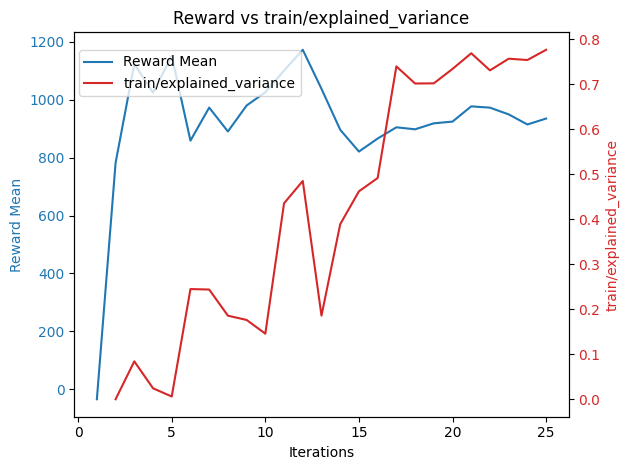

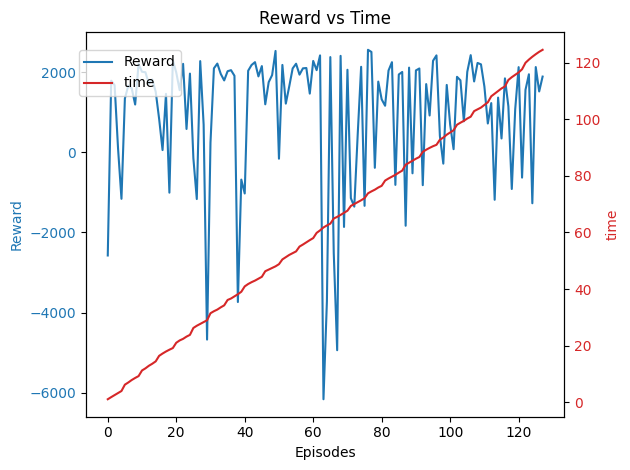

In [13]:
train_data_log: DataFrame = pd.read_csv(logs_path+"progress.csv")
train_data_monitor: DataFrame = pd.read_csv(logs_path+"monitor.csv", header=1)


print("Avaliable metrics: ", train_data_log.columns.to_list())

fig, ax1 = plt.subplots()

iterations: Series[int] = train_data_log['time/iterations'].astype(int)


ax1.set_xlabel('Iterations')
color = Color.BLUE.value
ax1.set_ylabel('Reward Mean', color=color)
ax1.plot(iterations,
         train_data_log['rollout/ep_rew_mean'], color=color, label='Reward Mean')
ax1.tick_params(axis='y', labelcolor=color)


col = 'train/explained_variance'

ax2 = ax1.twinx()
color = Color.RED.value
ax2.set_ylabel(col, color=color)
ax2.plot(iterations, train_data_log[col], color=color, label=col)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Reward vs ' + col)


fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()


fig, ax1 = plt.subplots()

episodes = range(len(train_data_monitor['l']))


ax1.set_xlabel('Episodes')
color = Color.BLUE.value
ax1.set_ylabel('Reward', color=color)
ax1.plot(episodes, train_data_monitor['r'], color=color, label='Reward')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Reward vs Time')


ax2 = ax1.twinx()
color = Color.RED.value
ax2.set_ylabel('time', color=color)
ax2.plot(episodes, train_data_monitor['t'], color=color, label='time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()

## Comprobación funcionamiento


In [14]:
seed = 289980628190634006122751570777790489191
env = make(env_id, seed=seed)
seed: int = env.np_random_seed
model = PPO.load(name, print_system_info=True)

num_steps = 1
obs, _ = env.reset(seed=seed)
# Variables de información:

stats = []
rewards = []

# -------------------------

_states = None
ant = env._get_info()
for episode in range(num_steps):

    done = False
    step_counter = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, terminated, info = env.step(action)

        stats.append(info["Stats"])
        rewards.append(reward)

        done: bool = done or terminated

    env.reset(seed=seed)
    step_counter += 1

# Debug
acciones = [x["Action"] for x in stats]
calcular_stats_acciones(acciones)

print(f"Seed: {env.np_random_seed}")

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

DENEGAR: 2.25%
PERMITIR: 97.75%
Seed: 289980628190634006122751570777790489191


In [15]:
assert len(acciones) != acciones.count(
    Acciones.DENEGAR), "Se han denegado todos los paquetes"
assert len(acciones) != acciones.count(
    Acciones.PERMITIR), "Se han permitido todos los paquetes"

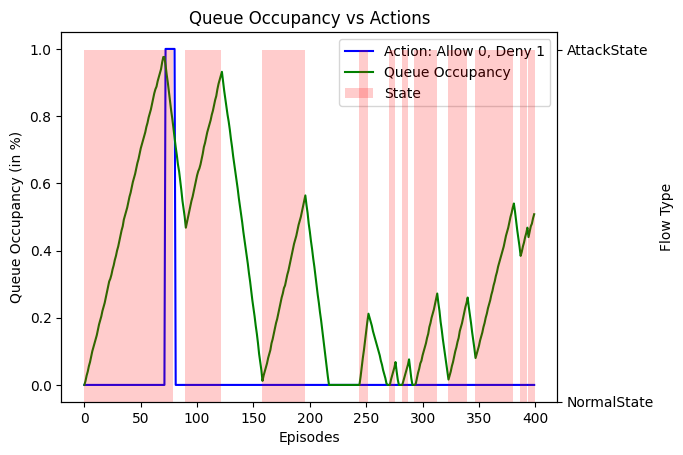

Rewards:  [8.5, 8.41, 8.29, 8.2, 8.08, 7.99, 7.87, 7.75, 7.66, 7.57, 7.48, 7.39, 7.27, 7.15, 7.06, 6.97, 6.85, 6.76, 6.67, 6.55, 6.43, 6.31, 6.19, 6.13, 6.04, 5.92, 5.83, 5.71, 5.62, 5.5, 5.41, 5.29, 5.17, 5.05, 4.96, 4.81, 4.72, 4.63, 4.54, 4.42, 4.3, 4.21, 4.09, 3.97, 3.88, 3.79, 3.67, 3.55, 3.46, 3.34, 3.22, 3.13, 3.04, 2.95, 2.86, 2.74, 2.65, 2.53, 2.44, 2.35, 2.23, 2.11, 1.99, 1.9, 1.84, 1.72, 1.63, 1.54, 1.45, 1.3, 1.18, -8.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, 1.98, 3.19, 3.37, 3.58, 3.73, 3.94, 4.15, 4.39, 4.57, 4.75, 4.99, 4.87, 4.75, 4.63, 4.51, 4.39, 4.3, 4.18, 4.06, 3.94, 3.82, 3.73, 3.67, 3.58, 3.46, 3.34, 3.19, 3.1, 2.98, 2.86, 2.77, 2.68, 2.59, 2.47, 2.38, 2.26, 2.14, 2.05, 1.9, 1.78, 1.69, 1.6, 1.51, 1.72, 1.93, 2.11, 2.29, 2.47, 2.62, 2.8, 3.01, 3.19, 3.4, 3.58, 3.76, 3.94, 4.12, 4.33, 4.51, 4.69, 4.87, 5.08, 5.26, 5.44, 5.62, 5.8, 6.01, 6.19, 6.4, 6.61, 6.79, 6.97, 7.18, 7.36, 7.57, 7.81, 7.99, 8.17, 8.41, 8.29, 8.2, 8.11, 8.02, 7.9, 7.81, 7.72, 7.57, 7.4

In [28]:
assert len(acciones) == len(rewards)
# plt.plot(rewards, label="rewards")

fig, ax1 = plt.subplots()
ocu = [x["OcupacionActual"] for x in stats]
att = 1
norm = 0
NormalState
estados: list[int] = [norm if x["EstadoMaquina"] ==
                      NormalState.__name__ else att for x in stats]

acciones: list[int] = [Acciones.action_to_int(x["Action"]) for x in stats]

# Primer eje Y con acciones y ocupación de cola
ax1.plot(
    acciones, label=f"Action: Allow {Acciones.action_to_int(Acciones.PERMITIR)}, Deny {Acciones.action_to_int(Acciones.DENEGAR)}", color='#0000FF')
ax1.plot(ocu, label="Queue Occupancy", color='green')
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Queue Occupancy (in %)")
ax1.set_title("Queue Occupancy vs Actions")

# Segundo eje Y con estados en gráfico de barras
ax2 = ax1.twinx()
ax2.bar(range(len(estados)), estados, color='red',
        label="State", alpha=0.20, width=1)
ax2.set_ylabel("Flow Type")
ax2.set_yticks([0, 1],[NormalState.__name__, AttackState.__name__])

# Combinar leyendas de ambos ejes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

plt.show()


print("Rewards: ", rewards)
calcular_stats_acciones(acciones)

Ocupación:  [0.0, 0.012, 0.028, 0.04, 0.056, 0.068, 0.084, 0.1, 0.112, 0.124, 0.136, 0.148, 0.164, 0.18, 0.192, 0.204, 0.22, 0.232, 0.244, 0.26, 0.276, 0.292, 0.308, 0.316, 0.328, 0.344, 0.356, 0.372, 0.384, 0.4, 0.412, 0.428, 0.444, 0.46, 0.472, 0.492, 0.504, 0.516, 0.528, 0.544, 0.56, 0.572, 0.588, 0.604, 0.616, 0.628, 0.644, 0.66, 0.672, 0.688, 0.704, 0.716, 0.728, 0.74, 0.752, 0.768, 0.78, 0.796, 0.808, 0.82, 0.836, 0.852, 0.868, 0.88, 0.888, 0.904, 0.916, 0.928, 0.94, 0.96, 0.976, 0.976, 0.952, 0.924, 0.9, 0.872, 0.844, 0.816, 0.792, 0.764, 0.736, 0.708, 0.684, 0.656, 0.636, 0.608, 0.58, 0.548, 0.524, 0.5, 0.468, 0.484, 0.5, 0.516, 0.532, 0.548, 0.56, 0.576, 0.592, 0.608, 0.624, 0.636, 0.644, 0.656, 0.672, 0.688, 0.708, 0.72, 0.736, 0.752, 0.764, 0.776, 0.788, 0.804, 0.816, 0.832, 0.848, 0.86, 0.88, 0.896, 0.908, 0.92, 0.932, 0.904, 0.876, 0.852, 0.828, 0.804, 0.784, 0.76, 0.732, 0.708, 0.68, 0.656, 0.632, 0.608, 0.584, 0.556, 0.532, 0.508, 0.484, 0.456, 0.432, 0.408, 0.384, 0.36,

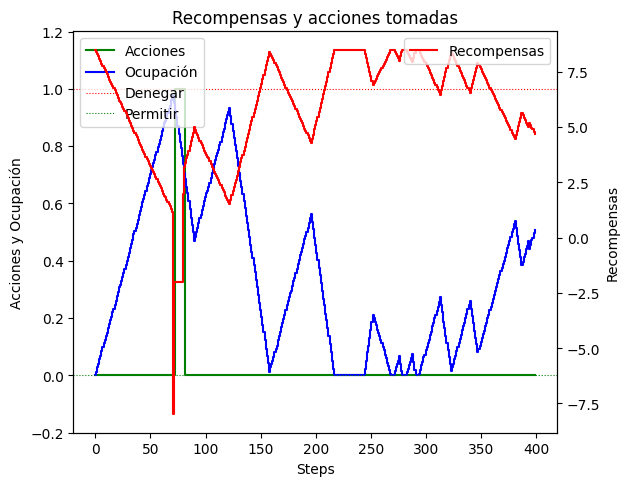

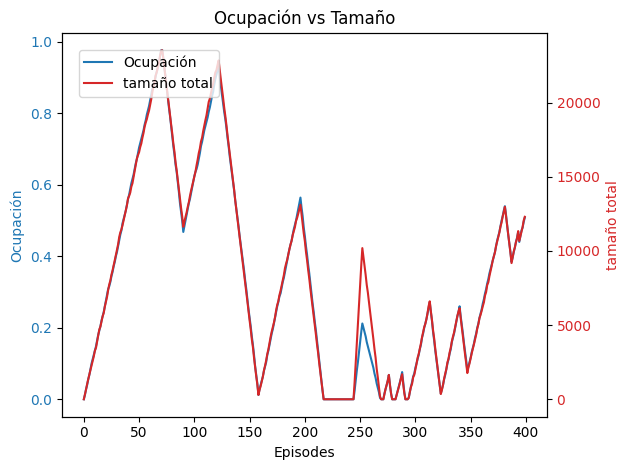

La ocupación máxima es de 98%
La ocupación mínima es de 0%


In [17]:
print("Ocupación: ", ocu)
fig, ax1 = plt.subplots()

# Configurar el eje X e Y
ax1.set_xlabel('Steps')
ax1.set_ylabel('Acciones y Ocupación')

# Graficar las acciones y la ocupación
ax1.step(range(len(acciones)), acciones,
         label="Acciones", where='post', color='green')
ax1.step(range(len(ocu)), ocu, label="Ocupación", where='mid', color='blue')


# Agregar marca en el eje Y
ticks = list(ax1.get_yticks())  # Obtener los ticks actuales

ax1.set_yticks(sorted(ticks))  # Actualizar los ticks


ax1.axhline(y=Acciones.action_to_int(Acciones.DENEGAR), color='red',
            linestyle='dotted', linewidth=0.8, label='Denegar')
ax1.axhline(y=Acciones.action_to_int(Acciones.PERMITIR),
            color='green', linestyle='dotted', linewidth=0.8, label='Permitir')


# Leyenda del primer eje
ax1.legend(loc=Location.UPPER_LEFT.value)

# Crear segundo eje Y para las recompensas
ax2 = ax1.twinx()
ax2.set_ylabel('Recompensas')
ax2.step(range(len(rewards)), rewards,
         label="Recompensas", where='mid', color='r')

# Leyenda del segundo eje
ax2.legend(loc=Location.UPPER_RIGHT.value)

# Ajustar diseño y mostrar título
fig.tight_layout()
plt.title("Recompensas y acciones tomadas")
plt.show()


tam = [x["TamañoTotal"] for x in stats]


fig, ax1 = plt.subplots()

train_data_monitor: DataFrame = pd.read_csv(logs_path+"monitor.csv", header=1)

episodes = range(len(train_data_monitor['l']))

# Plot rollout/ep_rew_mean on the first y-axis
ax1.set_xlabel('Episodes')
color = Color.BLUE.value
label = 'Ocupación'
ax1.set_ylabel(label, color=color)
ax1.plot(range(len(ocu)), ocu, color=color, label=label)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Ocupación vs Tamaño')


ax2 = ax1.twinx()
color = Color.RED.value
label = 'tamaño total'
ax2.set_ylabel(label, color=color)
ax2.plot(range(len(tam)), tam, color=color, label=label)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()

print(f"La ocupación máxima es de {np.max(ocu):.0%}")
print(f"La ocupación mínima es de {np.min(ocu):.0%}")